In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore") 

In [3]:
apples_oranges = pd.read_csv("D:\ProjectData\\apples_and_oranges.csv")

# display first few rows of data
apples_oranges.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


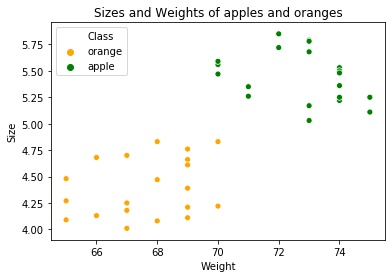

In [4]:
# create a dictionary to colour classes 
color_dict = dict({'orange':'orange',
                  'apple':'green'})
# scatterplot
plt.title('Sizes and Weights of apples and oranges')
sns.scatterplot(data=apples_oranges, x="Weight", y="Size", hue="Class", palette = color_dict)

In [5]:
# define input data
X = apples_oranges[["Weight", "Size"]]

# define target 
y = apples_oranges.Class

# fitting the support vector machine using a linear kernel

from sklearn import svm

clf = svm.SVC(kernel = 'linear', C=10)
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.coef_

array([[-0.65759054, -3.11967429]])

In [7]:
clf.intercept_

array([62.09725159])

In [8]:
b = clf.intercept_
w_1 = clf.coef_[0][0]
w_2 = clf.coef_[0][1]

b, w_1, w_2

(array([62.09725159]), -0.6575905440882028, -3.1196742877366077)

62.09725159 - 0.6575905440882028*Weight - 3.1196742877366077*Size = 0

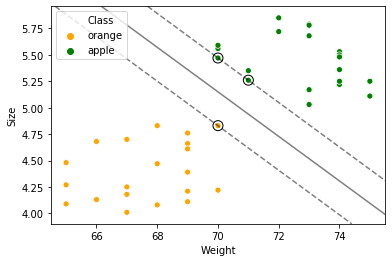

In [9]:
# plotting the hyperplane and support vector lines

ax = plt.gca()
sns.scatterplot(data=apples_oranges, x="Weight", y="Size", hue="Class", palette = color_dict)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 2)
yy = np.linspace(ylim[0], ylim[1], 2)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [10]:
clf.support_vectors_

array([[70.  ,  5.47],
       [71.  ,  5.26],
       [70.  ,  4.83]])

In [12]:
clf.predict([[70, 4.6]])

array(['orange'], dtype=object)